# analyse data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [42]:
def plot_reward(data: pd.DataFrame) -> None:
	for index, row in data[['rewards', 'SR']].iterrows():
		rew = row['rewards']
		sr = row['SR']
		plt.plot(rew, label=f"{index}, {sr}", alpha=0.7)
	plt.legend()
	plt.show()

# Cartpole

In [43]:
data = pd.read_csv('log/CartPole_v1_log.csv', delimiter=';')
data['rewards'] = data['rewards'].map(lambda x : np.array(list(map(float, x.split(',')))))
data = data.where(data['SR']>0.90).dropna()
data

,env,llm,reward_function,rewards,mean_reward,std_reward,SR
7,CartPole-v1,qwen2.5-coder,"def reward_func(observations: np.ndarray, term...","[0.00430713914556539, 0.0049367975543517335, 0...",0.024322,0.039425,1.00
16,CartPole-v1,qwen2.5-coder,"def reward_func(observations: np.ndarray, is_s...","[0.006517211874490863, 0.01102912778759992, 0....",0.028519,0.036442,1.00
17,CartPole-v1,qwen2.5-coder,"def reward_func(observations: np.ndarray, is_s...","[0.006517211874490863, 0.01102912778759992, 0....",0.028519,0.036442,1.00
18,CartPole-v1,qwen2.5-coder,"def reward_func(observations: np.ndarray, is_s...","[0.0044957303528576666, 0.010470972299065165, ...",0.026326,0.036318,1.00
19,CartPole-v1,qwen2.5-coder,"def reward_func(observations: np.ndarray, is_s...","[0.0044957303528576666, 0.010470972299065165, ...",0.026326,0.036318,1.00
26,CartPole-v1,qwen2.5-coder,"def reward_func(observations:np.ndarray, is_su...","[0.014283901153800392, 0.024185390763619086, 0...",0.027620,0.031636,1.00
27,CartPole-v1,qwen2.5-coder,"def reward_func(observations:np.ndarray, is_su...","[-0.046730880775070406, -0.06876168102932487, ...",-0.038073,0.012162,1.06
28,CartPole-v1,qwen2.5-coder,"def reward_func(observations:np.ndarray, is_su...","[-0.046730880775070406, -0.06876168102932487, ...",-0.038073,0.012162,1.06
30,CartPole-v1,qwen2.5-coder,"def reward_func(observations:np.ndarray, is_su...","[0.003647727787825481, 0.008510238890186208, 0...",0.024306,0.038189,1.00
31,CartPole-v1,qwen2.5-coder,"def reward_func(observations:np.ndarray, is_su...","[-0.00023294253991161537, 0.000339252567502347...",0.022343,0.036137,0.97


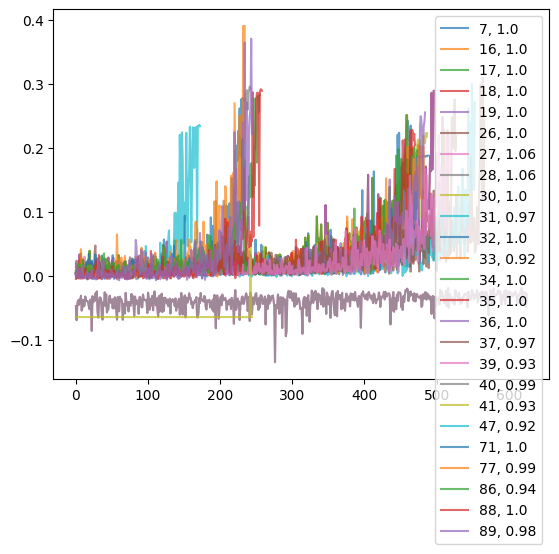

In [44]:
plot_reward(data)

In [36]:
data.loc[47]

env                                                      CartPole-v1
llm                                                    qwen2.5-coder
reward_function    def reward_func(observations:np.ndarray, is_su...
rewards            [0.00496324016524664, -0.0036319687486247184, ...
mean_reward                                                 0.037176
std_reward                                                   0.06632
SR                                                              0.92
Name: 47, dtype: object

In [37]:
print(data.loc[47].reward_function)

def reward_func(observations:np.ndarray, is_success:bool, is_failure:bool) -> float:    
    x, x_dot, theta, theta_dot = observations
    
    if is_success:
        return 10.0
    elif is_failure:
        return -10.0
    else:
        # Reward based on how close to vertical the pole is and how stable it is
        proximity_to_vertical = np.cos(theta)
        stability_factor = np.exp(-abs(theta_dot))
        
        reward = proximity_to_vertical * stability_factor
        
        return reward


# Lunar Lander

In [45]:
data = pd.read_csv('log/LunarLander_v3_log.csv', delimiter=';')
data['rewards'] = data['rewards'].map(lambda x : np.array(list(map(float, x.split(',')))))
data = data.where(data['SR']>0.2).dropna()
data

,env,llm,reward_function,rewards,mean_reward,std_reward,SR
7,LunarLander-v3,qwen2.5-coder,"def reward_func(observations: np.ndarray, is_s...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0002819988, 0...",0.0,0.035077,0.22
8,LunarLander-v3,qwen2.5-coder,import numpy as np\n\ndef reward_func(observat...,"[0.0, 0.0, 0.0, 0.00038981845, 0.0, 0.0, 0.000...",0.0,0.033390,0.56
9,LunarLander-v3,qwen2.5-coder,import numpy as np\n\ndef reward_func(observat...,"[0.0, 0.0, 0.00043540055, 0.0, 0.0, 0.0, 0.0, ...",0.0,0.030783,0.25
37,LunarLander-v3,qwen2.5-coder,"\ndef reward_func(observations: np.ndarray, is...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0.028435,0.57


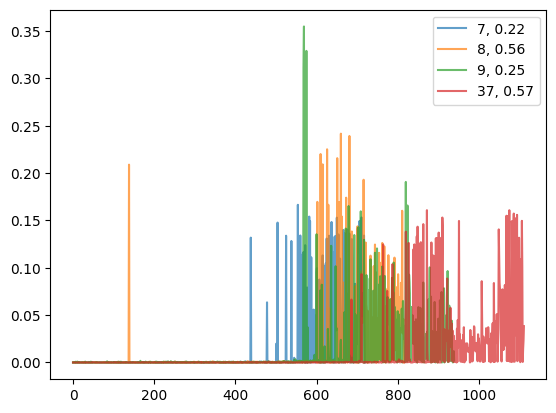

In [46]:
plot_reward(data)

In [47]:
data.loc[37]

env                                                   LunarLander-v3
llm                                                    qwen2.5-coder
reward_function    \ndef reward_func(observations: np.ndarray, is...
rewards            [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
mean_reward                                                      0.0
std_reward                                                  0.028435
SR                                                              0.57
Name: 37, dtype: object

In [48]:
print(data.loc[37].reward_function)


def reward_func(observations: np.ndarray, is_success: bool, is_failure: bool) -> float:
    x, y, v_x, v_y, theta, omega, leg_1, leg_2 = observations

    # Penalty for altitude and horizontal distance
    altitude_penalty = -abs(y) * 0.5  # Scaled down to emphasize landing stability over altitude
    distance_penalty = abs(x)

    # Reward for landing safely
    landing_reward = 100 if is_success else -50 if is_failure else 0

    # Penalty for angular deviation from vertical
    angular_penalty = abs(theta) * 1.0  # Scaled down to make it less significant

    # Penalize large angular velocity
    angular_velocity_penalty = abs(omega)

    # Reward for maintaining leg contact with the ground
    leg_contact_reward = 5 if leg_1 == 1 and leg_2 == 1 else -2  # Adjusted weights to be more punitive

    # Final reward calculation
    total_reward = landing_reward + altitude_penalty + distance_penalty - angular_penalty - angular_velocity_penalty + leg_contact_reward

    return max(total_

# Hopper

In [49]:
data = pd.read_csv('log/Hopper_v5_log.csv', delimiter=';')
data['rewards'] = data['rewards'].map(lambda x : np.array(list(map(float, x.split(',')))))
data

,env,llm,reward_function,rewards,mean_reward,std_reward,SR
0,Hopper-v5,qwen2.5-coder,NaN,"[0.0005934243612275808, 0.0005132563393057325,...",0.021957,0.023678,0.01
1,Hopper-v5,qwen2.5-coder,"def reward_func(observations:np.ndarray, is_su...","[0.0007582072138134282, 0.0007887611865726663,...",0.023535,0.035838,1.00
2,Hopper-v5,qwen2.5-coder,NaN,"[0.0009789184296580017, 0.006060892778637749, ...",0.021451,0.024341,0.00
3,Hopper-v5,qwen2.5-coder,"def reward_func(observations:np.ndarray, is_su...","[0.0015287619919382859, 0.008028910362660681, ...",0.017174,0.018135,0.00
4,Hopper-v5,qwen2.5-coder,NaN,"[8.37393266368405e-05, 0.0027228899664049166, ...",0.019542,0.020620,0.00
5,Hopper-v5,qwen2.5-coder,"def reward_func(observations:np.ndarray, is_su...","[-0.04044438887299981, -0.07175059865129467, -...",0.002032,0.006119,0.00
6,Hopper-v5,qwen2.5-coder,NaN,"[0.0006378107216595786, 0.0003230004659981532,...",0.019282,0.020974,0.00
7,Hopper-v5,qwen2.5-coder,"def reward_func(observations:np.ndarray, is_su...","[0.0012170830034077544, 0.0008750347887663748,...",0.025737,0.028890,0.00
8,Hopper-v5,llama3.2-vision,"def reward_func(observations:np.ndarray, is_su...","[-0.00022492303, -0.00033816296, 0.00025187744...",0.021356,0.020372,0.00
9,Hopper-v5,llama3.2-vision,"def reward_func(observations:np.ndarray, is_su...","[-0.0071265213, -0.0019119708, -0.005386197, -...",0.017936,0.007115,0.00


In [ ]:
print(data.iloc[1].reward_function)

In [ ]:
for idx, rew in enumerate(data.iloc['rewards']):
	plt.plot(rew, label=idx, alpha=0.7)
	plt.legend()